In [1]:
import os, rcmd, sys, plot_syn
%matplotlib inline

In [2]:
rcmd.run_command('./createdir_example_synthetic.sh')

0

In [3]:
cd tool_intro/example_synthetic/

/home/michael/esa_demo_new.git/tool_intro/example_synthetic


In [4]:
# terminate the installation
rcmd.run_command('make setup')

bin/rs_setup.py
------------------------------
Retrieval System Setup properly finished, Retrieval System ready for use!
------------------------------


0

In [2]:
ls -ralt input/

ls: cannot access 'input/': No such file or directory


In [7]:
cat ../mk.nos2.txt

nos2: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic MISSION_LST="S1A S1B"
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


runretrieval.x: $(OBJDIR)/runretrieval.o $(LIBRETR) $(LIBDERIV) $(LIBMODEL) $(LIBSUPPORT) $(LIBLBFGSB) $(LIBEIS)
	$(FC) -o $@ $(FFOPTI) $^ $(LDNCLIB)


In [5]:
rcmd.run_command('make simulate.x runretrieval.x')

gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul_s1.o src/sense/mo_sensimul_s1.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul_s2.o src/semid/mo_sensimul_s2.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul.o src/simulator/mo_sensimul.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/inst

gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/runretrieval.o driver/runretrieval.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_retrieval.o src/retrieval/mo_retrieval.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/cost.o src/retrieval/cost.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jo

0

In [9]:
cat ../mk.pre.txt


pregeneral:
	$(MAKE) pre PRE_MODE=pre_general
.PHONY: pregeneral

presynthetic:
	$(MAKE) pre PRE_MODE=pre_synthetic
.PHONY: presynthetic


pre:
	( args="";   \
          if [ "x$(PRE_MODE)" = "xpre_synthetic" ]; then \
            args="--time_start $(TIMSTART) --time_end $(TIMEND)"; \
            if [ "x$(NOXTGT)" = "x" ]; \
            then \
              args="$${args} --target_schedule $(TGTSCHEDULE_FILE)"; \
            fi; \
	    if [ "x$(MISSION_LST)" != "x" ]; \
            then \
	      args="$${args} --mission_lst $(MISSION_LST)"; \
            fi; \
          fi; \
          args="$${args} $(PREARGXTRA)"; \
	  $(RS_PRE_TOOL) $(PRE_MODE) $${args} 2>&1 | tee mk.$@.log; \
        )

RS_PRE_TOOL     := bin/rs_pre.py
TIMSTART        := 20170501
TIMEND          := 20170531
TGTSCHEDULE_FILE := input/target_schedule_2017.txt


In [10]:
rcmd.run_command('bin/rs_pre.py pre_synthetic -h')

2019-03-31 14:46:48,419 INFO::<module>:: rs_pre.py::PROGRAM START::2019-03-31T14:46:48.419735
2019-03-31 14:46:48,419 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic -h
usage: ==================================================
PROJECT

Sentinel Synergy Study (S^3)

DESCRIPTION

Retrieval System Preprocessor

Implements/Provides all preprocessing steps required to operate the retrieval
prototype system

EXAMPLES

available options are listed by invoking 'rs_pre.py -h' on the command line

EXIT STATUS

should be 0 in case of success, 1 otherwise

AUTHOR

The Inversion Lab, Michael Vossbeck <Michael.Vossbeck@Inversion-Lab.com>

================================================== pre_synthetic
[-h] [--time_start TIME_START] [--time_end TIME_END]
[--target_select target_tmin target_tmax target_tdelta]
[--target_schedule TARGET_SCHEDULE] [--site_nml SITE_NML] [--use_generic_prior]
[--prior_inifile PRIOR_INIFILE]
[--mission_lst {S1A,S1B,S2A,S2B} [{S1A,S1B,S2A,S2B} ...]] [--no_use_pr

0

In [11]:
cat input/target_schedule_2017.txt

#selected points of time for target processor fmt='%Y%m%dT%H:%M:%S'
20170510T12:00:00
20170511T12:00:00
20170512T12:00:00
20170513T12:00:00
20170514T12:00:00
20170515T12:00:00
20170516T12:00:00
20170517T12:00:00
20170518T12:00:00
20170519T12:00:00
20170520T12:00:00


In [6]:
rcmd.run_command('make presynthetic MISSION_LST="S1A S1B"')

make pre PRE_MODE=pre_synthetic
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic'
( args="";   \
if [ "xpre_synthetic" = "xpre_synthetic" ]; then \
args="--time_start 20170501 --time_end 20170531"; \
if [ "x" = "x" ]; \
then \
args="${args} --target_schedule input/target_schedule_2017.txt"; \
fi; \
if [ "xS1A S1B" != "x" ]; \
then \
args="${args} --mission_lst S1A S1B"; \
fi; \
fi; \
args="${args} "; \
bin/rs_pre.py pre_synthetic ${args} 2>&1 | tee mk.pre.log; \
)
2019-03-31 15:06:51,979 INFO::<module>:: rs_pre.py::PROGRAM START::2019-03-31T15:06:51.979377
2019-03-31 15:06:51,979 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic --time_start 20170501 --time_end 20170531 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B
2019-03-31 15:06:51,982 INFO::main:: user selection +++pre_synthetic+++
2019-03-31 15:06:51,982 INFO::pre_synthetic:: 'site.nml' was created as copy of Wallerfing default namelist file ***/home/michael

0

In [7]:
ls -ralt

total 2024
drwxr-xr-x  8 michael users    4096 Mar 31 15:04 src/
-rw-r--r--  1 michael users     499 Mar 31 15:04 README-DERIVATIVES.txt
-rw-r--r--  1 michael users     390 Mar 31 15:04 readme
-rw-r--r--  1 michael users     146 Mar 31 15:04 Make-local.inc
-rw-r--r--  1 michael users   19308 Mar 31 15:04 Makefile
drwxr-xr-x  2 michael users    4096 Mar 31 15:04 driver/
drwxr-xr-x  2 michael users    4096 Mar 31 15:04 bin/
drwxr-xr-x  3 michael users    4096 Mar 31 15:04 ../
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 input/
-rwxr-xr-x  1 michael users  282904 Mar 31 15:05 simulate.x*
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 objs/
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 lbfgsb/
drwxr-xr-x  2 michael users    4096 Mar 31 15:06 eispack/
drwxr-xr-x  2 michael users    4096 Mar 31 15:06 lib/
-rwxr-xr-x  1 michael users 1597968 Mar 31 15:06 runretrieval.x*
-rw-r--r--  1 michael users    1056 Mar 31 15:06 site.nml
-rw-r--r--  1 michael users   17402 Mar 31 15:06 retrconf

In [14]:
cat ../mk.nos2.txt

nos2: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic MISSION_LST="S1A S1B"
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


runretrieval.x: $(OBJDIR)/runretrieval.o $(LIBRETR) $(LIBDERIV) $(LIBMODEL) $(LIBSUPPORT) $(LIBLBFGSB) $(LIBEIS)
	$(FC) -o $@ $(FFOPTI) $^ $(LDNCLIB)


In [15]:
rcmd.run_command('make synthetic -n')

rm -f obs_s1.nc obs_s2.nc
./simulate.x  2>&1 | tee mk.synthetic.log
if [ -f sensimul_s1.nc ]; then mv sensimul_s1.nc obs_s1.nc; fi; \
if [ -f sensimul_s2.nc ]; then mv sensimul_s2.nc obs_s2.nc; fi


0

In [8]:
rcmd.run_command('make synthetic')

./simulate.x  2>&1 | tee mk.synthetic.log
INFO::runsim:calling initf...
DEBUG::load_ivgeom:ndims= 2
INFO::initf:retrieval configuration was read from ***retrconfig.nc***
DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  28 npts_s1=  17 npts_s2=   0
INFO::load_sitenml:successfully read site namelist file ***site.nml***
INFO::setprior:prior control vector was read from ***retrprior.nc***
DEBUG::setprior:ncrd_retrieval_prior terminated successfully
INFO::runsim:...done.
DEBUG::runsim:initf yields:n= 86 m= 34
INFO::runsim:calling initx...
INFO::runsim:...DONE.
DEBUG::runsim::calling simulate_s1s2 at x ...
j     x-physical       x-scaled        x-sigma
1     0.10000000     1.00000000     0.10000000
2     0.10000000     1.00000000     0.10000000
3     0.00284149     2.00000000     0.00142075
4     0.01342839     2.00000000     0.00671420
5     0.28455981     2.00000000     0.14227991
6     0.00627885     2.00000000     0.00313942
7     0.03541716     2.00000000     0.01770858
8 

0

In [9]:
ls -ralt

total 2048
drwxr-xr-x  8 michael users    4096 Mar 31 15:04 src/
-rw-r--r--  1 michael users     499 Mar 31 15:04 README-DERIVATIVES.txt
-rw-r--r--  1 michael users     390 Mar 31 15:04 readme
-rw-r--r--  1 michael users     146 Mar 31 15:04 Make-local.inc
-rw-r--r--  1 michael users   19308 Mar 31 15:04 Makefile
drwxr-xr-x  2 michael users    4096 Mar 31 15:04 driver/
drwxr-xr-x  2 michael users    4096 Mar 31 15:04 bin/
drwxr-xr-x  3 michael users    4096 Mar 31 15:04 ../
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 input/
-rwxr-xr-x  1 michael users  282904 Mar 31 15:05 simulate.x*
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 objs/
drwxr-xr-x  2 michael users    4096 Mar 31 15:05 lbfgsb/
drwxr-xr-x  2 michael users    4096 Mar 31 15:06 eispack/
drwxr-xr-x  2 michael users    4096 Mar 31 15:06 lib/
-rwxr-xr-x  1 michael users 1597968 Mar 31 15:06 runretrieval.x*
-rw-r--r--  1 michael users    1056 Mar 31 15:06 site.nml
-rw-r--r--  1 michael users   17402 Mar 31 15:06 retrconf

In [18]:
rcmd.run_command('make retrieval -n')

mkdir -p lib
make -C lbfgsb ../lib/liblbfgsb-gfortran.a FC="gfortran" FFLAGS="-Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native" LIBNAME="../lib/liblbfgsb-gfortran.a"
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/lbfgsb'
make[1]: '../lib/liblbfgsb-gfortran.a' is up to date.
make[1]: Leaving directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/lbfgsb'
mkdir -p lib
make -C eispack ../lib/libeis.a FC=gfortran FFLAGS="-Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native" LIBNAME="../lib/libeis.a"
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/eispack'
ma

0

In [20]:
rcmd.run_command('./runretrieval.x --help')



available options:
--dbglev         increase level of verbosity
--no_targets     disable target retrievals (Note: In particular, FAPAR retrieval may be time-consuming)




0

In [10]:
rcmd.run_command('make retrieval')

make -C lbfgsb ../lib/liblbfgsb-gfortran.a FC="gfortran" FFLAGS="-Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native" LIBNAME="../lib/liblbfgsb-gfortran.a"
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/lbfgsb'
make[1]: '../lib/liblbfgsb-gfortran.a' is up to date.
make[1]: Leaving directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/lbfgsb'
make -C eispack ../lib/libeis.a FC=gfortran FFLAGS="-Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native" LIBNAME="../lib/libeis.a"
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic/eispack'
make[1]: '../lib/libeis.a' i

0

In [3]:
rcmd.run_command('make save_exp SAVDIR=ex_nos2')

if [ "xex_nos2" != "x" ]; then \

          mkdir -p ex_nos2; \

          rm -f ex_nos2/*; \

          for f in `echo retrconfig.nc retrprior.nc retrmodel.nc retrctl.nml site.nml retrctlvecbounds.nml x.b sx.b fort.[0-9] fort.[0-9][0-9] sensimul_s?.nc sensimul_s?.b sensimul.b x.b sx.b iterate.dat Cx.b sigma.dat xrunua.log sigma.dat mk.pre.log iterate.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_post.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.retrieval.log sigma.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_poast.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.mba.log obs_s1.nc obs_s2.nc simulation.nc mk.synthetic.log`; \

          do \

    if [ -f ${f} ]; \

            then \

              cp -a ${f} ex_nos2; \

            fi; \

          done; \

        fi;



0

(<matplotlib.figure.Figure at 0x7f6dc4064b90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6d99404110>)

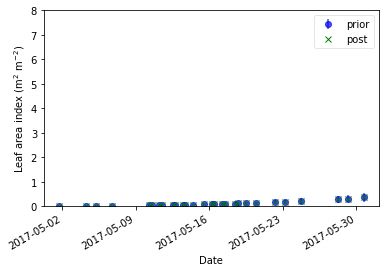

In [4]:
plot_syn.plot_state('lai', _dir='ex_syn-nos2')